In [ ]:
"""WineRetail Inc. is facing challenges in optimizing their inventory and pricing strategy to maximize sales and customer satisfaction.
The retailer needs to understand the relationship between wine prices, ratings, regional influences, and grape varieties
to make informed decisions on which wines to stock."""

In [ ]:
"""HYPOTHESES: 
- Price and Rating Disparity
- Regional Influence on Wine Ratings
- Grape Variety Impact on Wine Reviews"""

# Load libraries

In [ ]:
import pandas as pd # Library to work with dataframes
import numpy as np # Library to work on mathematical operations on arrays
import matplotlib.pyplot as plt # Library to plot graphics
import seaborn as sns # to build modern graphics
import zipfile # for file decompression
import os # to  interact with the underlying operating system

# Load datasets

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv("../data/raw/winemag-data_first150k.csv")
df2 = pd.read_csv("../data/raw/winemag-data-130k-v2.csv")
# Print the columns of the DataFrame to verify successful loading
display(df.head())
print()
display(df2.head())



# Concat datasets

In [24]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [25]:
df2.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [26]:
combined_df = pd.concat([df, df2], join = "outer").reset_index()
combined_df
#df.merge(df2, how = "right")

,index,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


# Checking for Null Values

In [27]:
# with this amount of Null values in col  taster_name,taster_twitter_handle and title .dropna might be in order 
combined_df.isna().sum()

index                         0
Unnamed: 0                    0
country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

# Dropping Null Values

### not necessary in this case

In [28]:
#combined_df.dropna(subset = ["taster_name","taster_twitter_handle","title"])

# Filling null values

In [29]:
# all the nulls in column price changed to "0" and casted as float64,all the other null values changed to "Unknown"
combined_df["price"].fillna(0).astype(float)
combined_df.fillna("Unknown")
combined_df.head()

,index,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [30]:
combined_df.dtypes

index                      int64
Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
variety                   object
winery                    object
taster_name               object
taster_twitter_handle     object
title                     object
dtype: object

In [31]:
combined_df.duplicated().sum()

0

# Removing Columns

In [32]:
# here I dropped columns using combined_df = combined_df.drop("Unnamed: 0", axis=1) 

combined_df

,index,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [33]:
combined_df.columns

Index(['index', 'Unnamed: 0', 'country', 'description', 'designation',
       'points', 'price', 'province', 'region_1', 'region_2', 'variety',
       'winery', 'taster_name', 'taster_twitter_handle', 'title'],
      dtype='object')

#  Statistics of numerical data

In [34]:
# Display statistics for 'price' and 'points' columns
""" count:null values for the price column and points column
mean: average of price and points , 
std: The standard deviation for the price is about $38.61, indicating a wide range of prices, 
while the standard deviation for points is 3.15, showing less variability in ratings. 
min: The minimum price is $4, and the lowest rating is 80 points.
25%:of the wines cost $16 or less, and 25% have a rating of 86 points or less.
50% (median): The median price is $25, and the median rating is 88 points.
75%:of the wines cost $40 or less, and 75% have a rating of 90 points or less.
max: The maximum price of a wine is $3,300, and the highest rating is 100 points."""

statistics = combined_df[["price", "points"]].describe().round(2)

display("Statistics for 'price' and 'points':")
display(statistics)

"Statistics for 'price' and 'points':"

,price,points
count,258210.00,280901.00
mean,34.18,88.15
std,38.61,3.15
min,4.00,80.00
25%,16.00,86.00
50%,25.00,88.00
75%,40.00,90.00
max,3300.00,100.00


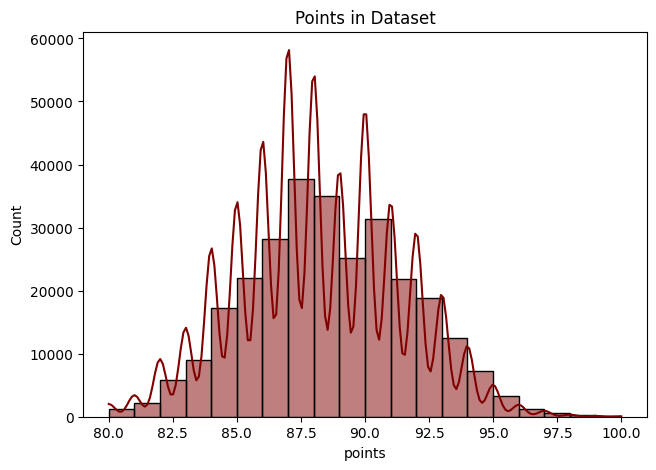

In [35]:
""" most wines in the dataset will rank between 82 and 95 """
# Create a DataFrame with the statistics provided
stats_data = {
    'metric': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'price': [258210.00, 34.18, 38.61, 4.00, 16.00, 25.00, 40.00, 3300.00],
    'points': [280901.00, 88.15, 3.15, 80.00, 86.00, 88.00, 90.00, 100.00]
}
df_stats = pd.DataFrame(stats_data)

# Define the size of the figure
plt.figure(figsize=(16, 5))

# Create the first subplot for 'points'
plt.subplot(1, 2, 1)
g1 = sns.histplot(x='points', data=combined_df, bins=20, kde=True, color='maroon')
g1.set_title("Points in Dataset")
plt.savefig("../images/figura1.png")
plt.show()

# Crossing points and price

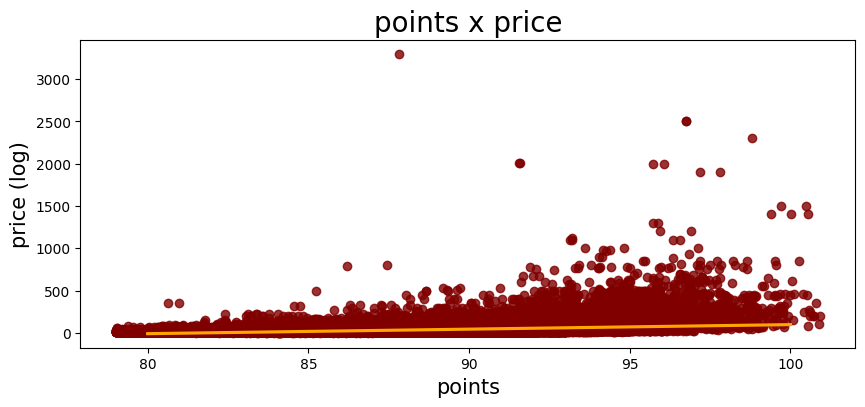

In [38]:
""" data shows that the most expensive wine is not the one with the most points """
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', 
                data=combined_df, line_kws={'color':'orange'},
                x_jitter=True, fit_reg=True, color='maroon')
g.set_title("points x price", fontsize=20)
g.set_xlabel("points", fontsize= 15)
g.set_ylabel("price (log)", fontsize= 15)

plt.show()

# Value count

In [51]:
# Calculate the most common grape varieties in the dataset
common_varieties = combined_df['variety'].value_counts().head(5)

# Print the most common grape varieties
display("Most common grape varieties in the dataset:")
display(common_varieties)

'Most common grape varieties in the dataset:'

variety
Pinot Noir                  27563
Chardonnay                  26235
Cabernet Sauvignon          22272
Red Blend                   19008
Bordeaux-style Red Blend    14262
Name: count, dtype: int64

In [18]:
common_varieties_top5_df = pd.DataFrame(common_varieties.iloc[:5]).reset_index()
common_varieties_top5_df

,variety,count
0,Pinot Noir,27563
1,Chardonnay,26235
2,Cabernet Sauvignon,22272
3,Red Blend,19008
4,Bordeaux-style Red Blend,14262


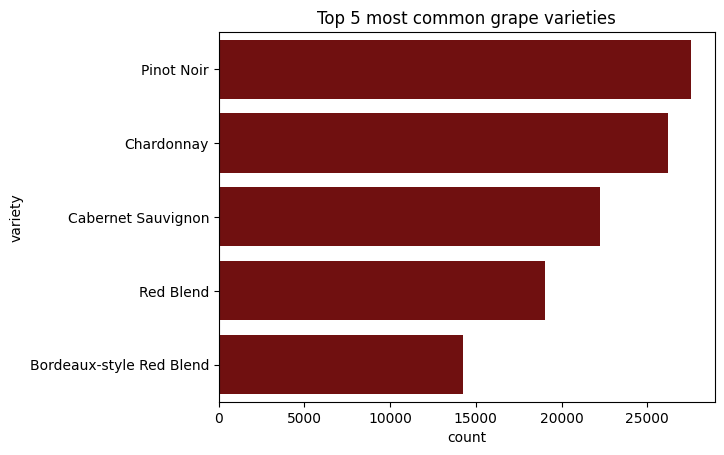

In [19]:
ax=sns.barplot(data=common_varieties_top5_df, y='variety', x='count', color="maroon")
ax.set_title("Top 5 most common grape varieties");
plt.savefig("../images/figura3.png");

# Group by

In [20]:
#Group by 'country' and count occurrences of each 'variety', then find the most common one
most_common_variety_by_country = combined_df.groupby('country')['variety'].agg(lambda x: x.value_counts().idxmax()).head()

#print the most common grape variety by country
display("Most common grape variety by country:")
display(most_common_variety_by_country)

'Most common grape variety by country:'

country
Albania               Kallmet
Argentina              Malbec
Armenia               Kangoun
Australia              Shiraz
Austria      Grüner Veltliner
Name: variety, dtype: object

In [47]:
# Calculate the average rating for each country
average_ratings_by_country = combined_df.groupby('country')['points'].mean().sort_values(ascending=False)

# Print the countries with the highest-rated wines
print("Countries producing the highest-rated wines in the dataset:")
print(average_ratings_by_country.head())

# Find the average ratings for France, Italy, Spain, and the US
countries_of_interest = ['France', 'Italy', 'Spain', 'US', "Chile"]
average_ratings_specific_countries = average_ratings_by_country[countries_of_interest]

# Print the average ratings for the specified countries
print("\nAverage ratings for the 5 biggest wine producers in the world:")
print(average_ratings_specific_countries)

Countries producing the highest-rated wines in the dataset:
country
England    91.722892
Austria    89.707591
Germany    89.200996
India      89.000000
France     88.884559
Name: points, dtype: float64

Average ratings for the 5 biggest wine producers in the world:
country
France    88.884559
Italy     88.481147
Spain     86.932542
US        88.166106
Chile     86.382290
Name: points, dtype: float64


C:\Users\Meli\AppData\Local\Temp\ipykernel_17476\1485681643.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=45);


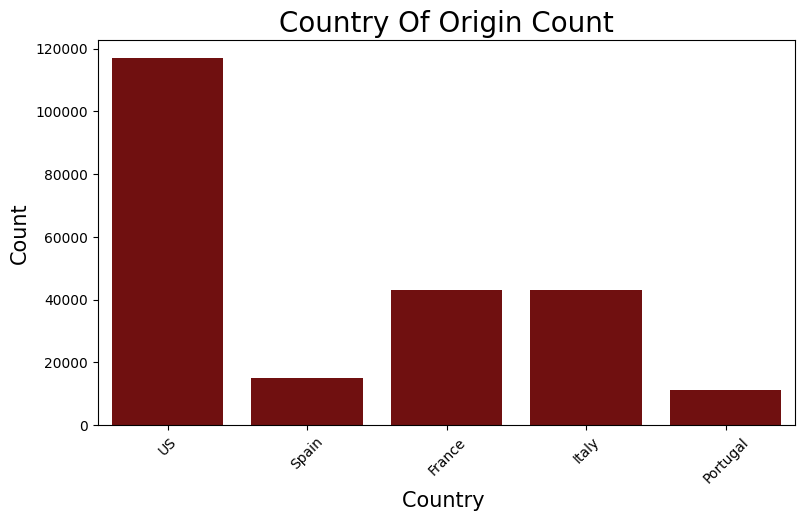

In [48]:
""" this graph shows amount on ocurrances in the dataset, not the biggest wine producers in the world, the US is the 4th producer """
plt.figure(figsize=(9,5))

country = combined_df.country.value_counts()[:5]

g = sns.countplot(x='country', 
                  data=combined_df[combined_df.country.isin(country.index.values)],
                 color='maroon');
g.set_title("Country Of Origin Count", fontsize=20);
g.set_xlabel("Country ", fontsize=15);
g.set_ylabel("Count", fontsize=15);
g.set_xticklabels(g.get_xticklabels(),rotation=45);


plt.show();

In [49]:
# Group by 'variety' and 'country', then calculate the average rating
average_ratings_by_variety_country = combined_df.groupby(['variety', 'country'])['points'].mean().sort_values(ascending=False).round(2).head(5)

# Reset index to turn the MultiIndex into columns
average_ratings_by_variety_country = average_ratings_by_variety_country.reset_index()

# Print the grape varieties with the highest average ratings and their respective countries
display("Grape varieties with the highest average ratings and their countries:")
display(average_ratings_by_variety_country)

'Grape varieties with the highest average ratings and their countries:'

,variety,country,points
0,Cabernet-Shiraz,Australia,96.00
1,Tinta del Pais,Spain,95.00
2,Terrantez,Portugal,95.00
3,Muscat,South Africa,94.67
4,Muscadel,Australia,94.14


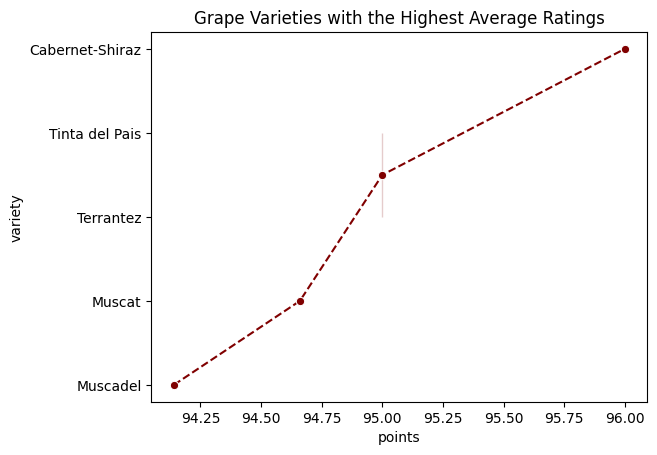

In [43]:
# Grape varieties and scores

# Create the DataFrame
data = {
    'variety': ['Cabernet-Shiraz', 'Tinta del Pais', 'Terrantez', 'Muscat', 'Muscadel'],
    'country': ['Australia', 'Spain', 'Portugal', 'South Africa', 'Australia'],
    'points': [96.00, 95.0, 95.00, 94.66, 94.14]
}

df = pd.DataFrame(data)

# Create the barplot
ax = sns.lineplot(data=df, y='variety', x='points', marker = "o", linestyle = "--", color="maroon")

# Set the title
ax.set_title("Grape Varieties with the Highest Average Ratings")

# Save the figure
plt.savefig("../images/figura1.png")

# Show the plot
plt.show()

In [50]:
# Origin destination

# Group the data by both 'designation' and 'country' and calculate the average rating
designation_country_ratings = combined_df.groupby(['designation', 'country'])['points'].mean()

# Sort the average ratings in descending order to find the top-rated designations
top_rated_designations = designation_country_ratings.sort_values(ascending=False)

# Display the top-rated designations along with their countries
display("Top 5 Best Rated Wine Origin Designations and Their Countries:")
display(top_rated_designations.head(5))  # Displaying the top 10 designations

'Top 5 Best Rated Wine Origin Designations and Their Countries:'

designation                          country 
Barca-Velha                          Portugal    100.0
Cristal Vintage Brut                 France      100.0
Clos du Mesnil                       France      100.0
Clos du Mesnil Brut Blanc de Blancs  France       99.0
Nacional Vintage                     Portugal     99.0
Name: points, dtype: float64

# Findings and conclusions

In [ ]:
"""Price and Rating Disparity: 
The maximum price of a wine is $3,300, but the highest-rated wines (100 points) are not the most expensive, 
demonstrating that high prices do not always align with top scores.
Regional Influence on Wine Ratings: 
Countries like England, which is not traditionally known for expensive wines, have the highest average ratings (91.72 points).
Grape Variety Impact on Wine Reviews:
The list of top 5 best-rated wine origin designations includes a variety of grape types, suggesting that certain varieties are 
more likely to produce highly-rated wines, like the spanish grape called Tinta del País or Tempranillo from Ribera del Duero."""

In [ ]:
""" By analyzing the correlation between price and ratings, the retailer can adjust their inventory to focus on wines 
that offer the best value for customers (e.g., moderately priced wines with high ratings).
Develop marketing campaigns that highlight wines from non-traditional but high-performing regions like England and Austria.
Educate customers about the value of wines from emerging regions and specific grape varieties through in-store tastings, 
online content, and expert recommendations."""
